# Pomegranate example

In [1]:
import numpy

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from plot_utilities_svm import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from pomegranate import NaiveBayes, NormalDistribution

n, d, m = 50000, 5, 10
std_noise = 1
X, y = make_blobs(n, d, m, cluster_std=std_noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

n_unlabeled = int(X_train.shape[0] * 0.999)
idxs = numpy.random.choice(X_train.shape[0], size=n_unlabeled)
y_train[idxs] = -1

model = NaiveBayes.from_samples(NormalDistribution, X_train, y_train, verbose=True)

[1] Improvement: 136.12341361580184	Time (s): 0.04318
[2] Improvement: 0.009984199365135282	Time (s): 0.04402
Total Improvement: 136.13339781516697
Total Time (s): 0.1418


Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.99788136 0.         0.         0.
  0.00211864 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.     

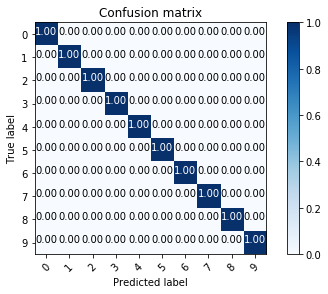

In [2]:
class_names = numpy.arange(m)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(plt, numpy, cm, class_names)